In [1]:
using QuantumOptics
using Combinatorics
using Plots
using LaTeXStrings

In [2]:
Nx = 5
Ny = 5
N = Nx*Ny
p = 1
q = 5
PN = 4

4

In [3]:
α = p/q
lb = α/sqrt(2*pi*α)

0.17841241161527713

In [4]:
QhCoord = [3+im*2]

1-element Vector{Complex{Int64}}:
 3 + 2im

In [5]:
NLevel = NLevelBasis(N)

NLevel(N=25)

In [6]:
C(n,r) = Int(factorial(big(n))/(factorial(big(n-r))*factorial(big(r))))

C (generic function with 1 method)

In [7]:
C(N,PN)

12650

In [8]:
St = fermionstates(NLevel,PN)

12650-element Vector{Vector{Int64}}:
 [1, 1, 1, 1, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 1, 1, 0, 1, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 1, 1, 0, 0, 1, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 1, 1, 0, 0, 0, 1, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 1, 1, 0, 0, 0, 0, 1, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 1, 1, 0, 0, 0, 0, 0, 1, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 1, 1, 0, 0, 0, 0, 0, 0, 1  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 1, 1, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 1, 1, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 1, 1, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 1, 1, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 1, 1, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 1, 1, 0, 0, 0, 0, 0, 0, 0  …  1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 ⋮
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 1, 1, 0, 1, 1, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 1, 

In [9]:
mb = ManyBodyBasis(NLevel,St)

ManyBody(onebodybasis=NLevel(N=25), states:12650)

In [10]:
SiteCoords = [ [x,y] for x in 1:Nx for y in 1:Ny ];

In [11]:
ParCoords(i, SiteCoords) = filter(>([0,0]),St[i].*SiteCoords)

ParCoords (generic function with 1 method)

In [12]:
ComplexCoords(i, SiteCoords) = Complex.(getindex.(ParCoords(i, SiteCoords), 1),getindex.(ParCoords(i, SiteCoords), 2))

ComplexCoords (generic function with 1 method)

In [13]:
Comb(i, SiteCoords) = collect(combinations(ComplexCoords(i, SiteCoords),2))

Comb (generic function with 1 method)

In [14]:
e(i, SiteCoords) = exp(-sum(abs.(ComplexCoords(i, SiteCoords)).^2)/(4*lb))

e (generic function with 1 method)

In [15]:
ComplexCoordsDiff(i, SiteCoords) = getindex.(Comb(i, SiteCoords),1)-getindex.(Comb(i, SiteCoords),2)

ComplexCoordsDiff (generic function with 1 method)

In [16]:
Ψ(i, SiteCoords) =  prod( (ComplexCoordsDiff(i, SiteCoords).^2).*QhCoord)*e(i, SiteCoords)

Ψ (generic function with 1 method)

In [17]:
# lb tanımı

In [18]:
diag = collect(1:length(St))
coeff = [ Ψ(i, SiteCoords) for i in 1:length(St)]
ΨΨ = sparse(diag,diag,coeff)

12650×12650 SparseArrays.SparseMatrixCSC{ComplexF64, Int64} with 12650 stored entries:
⎡⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎤
⎢⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⎥
⎣⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⎦

In [19]:
∑ψψ = ΨΨ.nzval

12650-element Vector{ComplexF64}:
  -5.971514294884565e-16 - 2.429687388778585e-16im
 -3.1857871562095984e-20 - 1.2962318257206622e-20im
   -3.476849473942876e-9 + 9.140474944204116e-10im
  1.9898927455271952e-11 + 8.096467780326868e-12im
  -2.505957578075711e-14 - 4.172313032662477e-14im
  2.4781033124408318e-17 + 1.0082897015729773e-17im
   7.836544458015322e-23 + 7.541963473337078e-22im
  -2.683837796381981e-11 - 4.468476048184073e-11im
   4.508153882058055e-13 + 1.834275879284555e-13im
   -6.82498047361879e-16 + 1.7942555029007232e-16im
  1.7306877909635893e-20 - 1.2487807595142452e-19im
  1.6635632112640467e-24 - 2.447587021357389e-25im
    2.87630383874489e-15 - 2.075401993990925e-14im
                         ⋮
  5.0350308077185245e-80 + 1.194220945715258e-80im
  -1.415808290516568e-85 + 5.96927929136651e-85im
   -5.83059004490446e-90 + 4.8556422530753135e-90im
   4.680227730297122e-83 + 1.9042892190103278e-83im
 -2.8573123648183796e-88 + 7.022500800006525e-88im
  -1.42906050739

In [20]:
Kett = normalize(Ket(mb,∑ψψ))

Ket(dim=12650)
  basis: ManyBody(onebodybasis=NLevel(N=25), states:12650)
      -7.644163978e-8 - 3.110254434e-8im
         -4.07814e-12 - 1.65931e-12im
  -0.4450731622506791 + 0.11700765645389181im
  0.00254727121041314 + 0.00103643270870864im
     -3.2078882681e-6 - 5.34099784665e-6im
        3.17223189e-9 + 1.29071646e-9im
            1.003e-14 + 9.655e-14im
 -0.00343559358538755 - 0.00572011753776424im
     5.77090932247e-5 + 2.348065316465e-5im
      -8.736690111e-8 + 2.296835041e-8im
          2.21546e-12 - 1.59857e-11im
              2.1e-16 - 3.0e-17im
      3.6819702857e-7 - 2.6567320079e-6im
                      ⋮
                  0.0 + 0.0im
                 -0.0 + 0.0im
                 -0.0 + 0.0im
                  0.0 + 0.0im
                 -0.0 + 0.0im
                 -0.0 + 0.0im
                 -0.0 + 0.0im
                 -0.0 - 0.0im
                 -0.0 - 0.0im
                 -0.0 - 0.0im
                 -0.0 - 0.0im
                 -0.0 - 0.0im

In [21]:
expectation = [expect(number(mb,n),Kett) for n in 1:N]

25-element Vector{ComplexF64}:
     0.9999999908406698 + 0.0im
     0.9997587737710123 + 0.0im
    0.21206665394887042 + 0.0im
  2.0745619747520338e-7 + 0.0im
 1.0664299043909543e-16 + 0.0im
     0.9997587737710124 + 0.0im
     0.5759705051035373 + 0.0im
 0.00018911483829759263 + 0.0im
  7.232771695241246e-11 + 0.0im
  2.938110040829583e-20 + 0.0im
    0.21206665394886892 + 0.0im
  0.0001891148382975926 + 0.0im
   3.882382135592336e-9 + 0.0im
  3.172304752258019e-16 + 0.0im
  6.371016760254972e-26 + 0.0im
   2.074561974752034e-7 + 0.0im
  7.232771695241245e-11 + 0.0im
  3.172304752258018e-16 + 0.0im
  8.201215542088269e-24 + 0.0im
   7.98159833099678e-34 + 0.0im
 1.0664299043909541e-16 + 0.0im
 2.9381100408295824e-20 + 0.0im
  6.371016760254972e-26 + 0.0im
   7.98159833099678e-34 + 0.0im
  4.382275249696893e-44 + 0.0im

In [22]:
sum(expectation)

3.9999999999999996 + 0.0im

In [23]:
den = reshape(expectation, Nx, Ny)

5×5 Matrix{ComplexF64}:
         1.0+0.0im     0.999759+0.0im  …  1.06643e-16+0.0im
    0.999759+0.0im     0.575971+0.0im     2.93811e-20+0.0im
    0.212067+0.0im  0.000189115+0.0im     6.37102e-26+0.0im
  2.07456e-7+0.0im  7.23277e-11+0.0im      7.9816e-34+0.0im
 1.06643e-16+0.0im  2.93811e-20+0.0im     4.38228e-44+0.0im

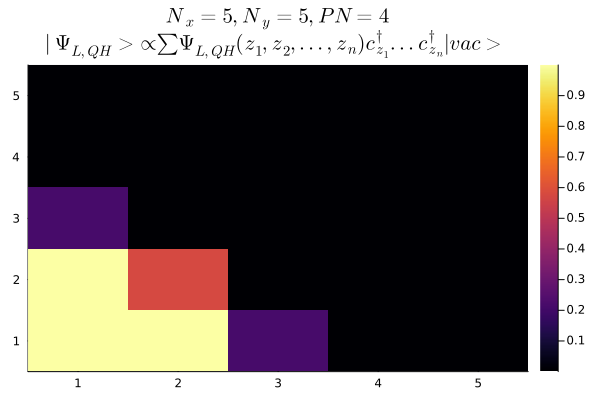

In [24]:
heatmap(real(den),
    title=L"N_x= %$(Nx), N_y= %$(Ny), PN= %$(PN)"*"\n"*L"|Ψ_{L,QH}> ∝ ∑ Ψ_{L,QH}(z_1,z_2,...,z_n) c^{\dagger}_{z_1}...c^{\dagger}_{z_n}|vac>"*"\n"
)